Dataset Shape
Images: (14000, 50, 50)
Labels: (14000, 2)

Dataset Split Summary
--------------------------------------
Train Images: (9800, 50, 50, 1)
Validation Images: (2100, 50, 50, 1)
Test Images: (2100, 50, 50, 1)
--------------------------------------
Train Labels: (9800, 2)
Validation Labels: (2100, 2)
Test Labels: (2100, 2)
train.csv saved successfully.
validation.csv saved successfully.
test.csv saved successfully.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       247,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,802 (987.51 KB)

 Trainable params: 252,802 (987.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
307/307 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - loss: 0.0232 - mae: 0.0985 - val_loss: 0.0016 - val_mae: 0.0273
Epoch 2/25
307/307 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - loss: 0.0011 - mae: 0.0237 - val_loss: 6.2983e-04 - val_mae: 0.0179
Epoch 3/25
307/307 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - loss: 5.2781e-04 - mae: 0.0171 - val_loss: 3.8930e-04 - val_mae: 0.0144
Epoch 4/25
307/307 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - loss: 4.1007e-04 - mae: 0.0152 - val_loss: 3.1735e-04 - val_mae: 0.0128
Epoch 5/25
307/307 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - loss: 3.4634e-04 - mae: 0.0137 - val_loss: 3.4015e-04 - val_mae: 0.0130
Epoch 6/25
307/307 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - loss: 2.4343e-04 - mae: 0.0111 - val_loss: 1.8555e-04 - val_mae: 0.0090
Epoch 7/25
307/307 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - loss: 1.7004e-04 - mae: 0.0090 - val_loss: 2.7471e-04 - val_mae: 0.0123
Epoch 8/25
307/307 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - loss: 2.6866e-04 - mae: 0.0118 - val_loss: 2.2597e-04 - val_

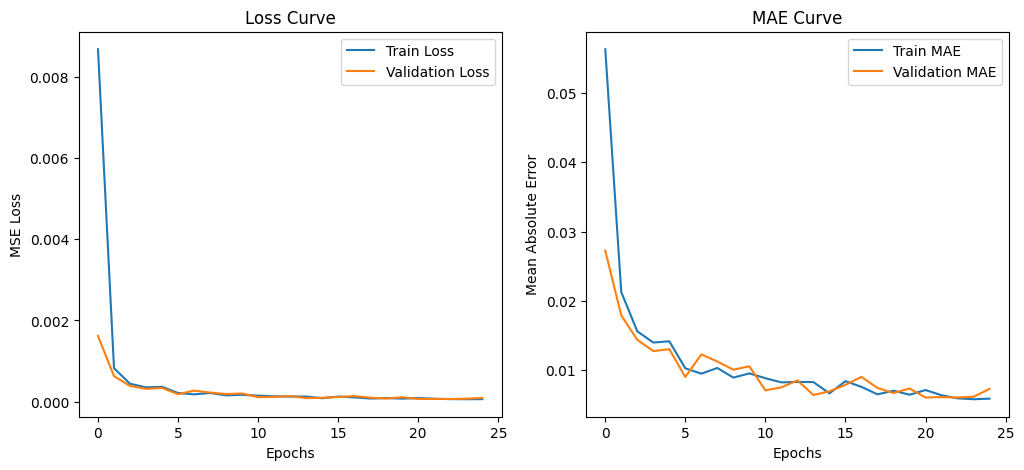

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.5816e-05 - mae: 0.0066
Test Loss (MSE): 8.114725642371923e-05
Test MAE: 0.006799028255045414
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


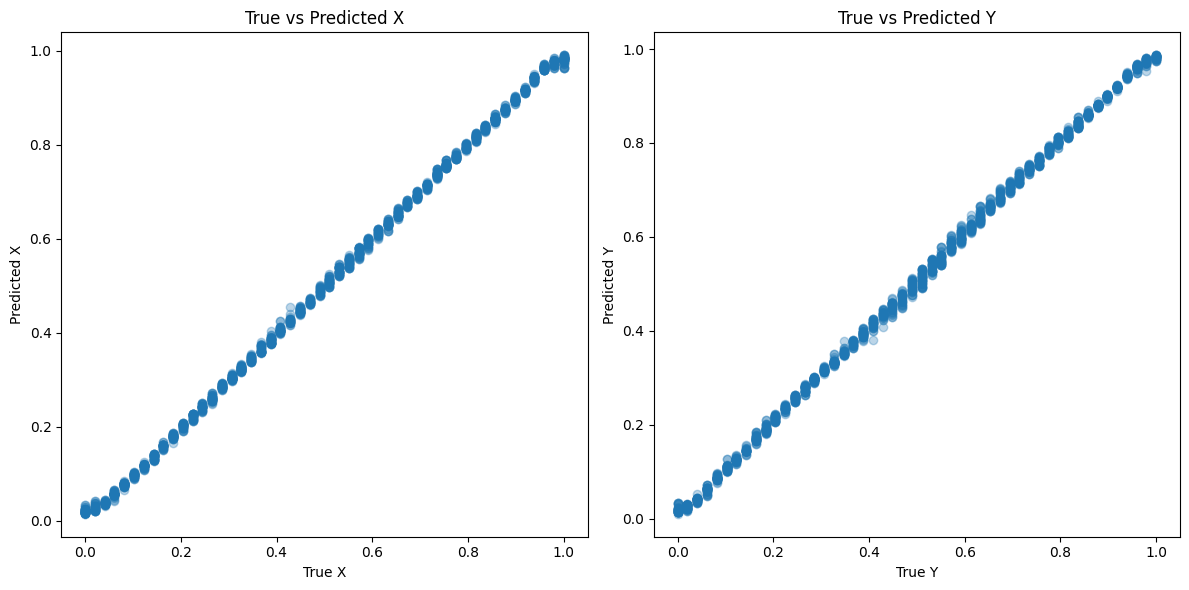

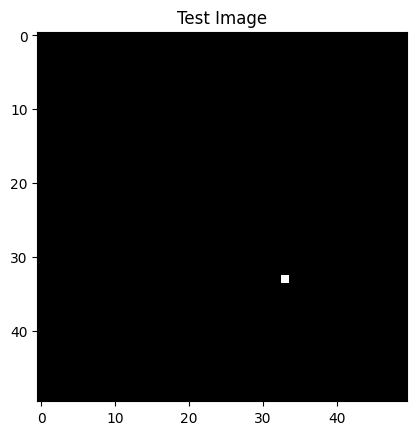

True Coordinates: [33. 33.]
Predicted Coordinates: [33.07667  32.911366]


In [5]:
# =========================================
# ML Assignment: Supervised Regression
# Predict (x, y) coordinates of a single white pixel
# in a 50x50 grayscale image using CNN
# =========================================

# Step 0: Install required packages (run in terminal or notebook)
# pip install pandas numpy opencv-python tensorflow matplotlib scikit-learn

# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# ===============================
# Step 2: Dataset Generation
# ===============================

def generate_dataset(num_samples: int = 14000, image_size: int = 50):
    """
    Generate a dataset of grayscale images with a single white pixel.
    Args:
        num_samples (int): Number of images to generate
        image_size (int): Height/Width of square image

    Returns:
        images (np.array): Array of shape (num_samples, image_size, image_size)
        labels (np.array): Array of (x, y) coordinates
    """
    images = []
    labels = []

    for _ in range(num_samples):
        # Create black image
        img_color = np.zeros((image_size, image_size, 3), dtype=np.uint8)

        # Random pixel coordinates
        x = np.random.randint(0, image_size)
        y = np.random.randint(0, image_size)

        # Set single white pixel
        img_color[x, y] = [255, 255, 255]

        # Convert to grayscale
        img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

        images.append(img_gray)
        labels.append([x, y])

    images = np.array(images, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)

    return images, labels


# Generate dataset
X, y = generate_dataset()
print("Dataset Shape")
print("Images:", X.shape)
print("Labels:", y.shape)

# ===============================
# Step 3: Preprocess Dataset
# ===============================

# Normalize image pixels to [0,1]
X = X / 255.0

# Add channel dimension for CNN input
X = X[..., np.newaxis]  # shape: (num_samples, 50, 50, 1)

# Scale labels to [0,1] for sigmoid output
image_size = 50
y_scaled = y / (image_size - 1)

# ===============================
# Step 4: Train/Validation/Test Split
# ===============================

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_scaled, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("\nDataset Split Summary")
print("--------------------------------------")
print("Train Images:", X_train.shape)
print("Validation Images:", X_val.shape)
print("Test Images:", X_test.shape)
print("--------------------------------------")
print("Train Labels:", y_train.shape)
print("Validation Labels:", y_val.shape)
print("Test Labels:", y_test.shape)

# ===============================
# Step 5: Save splits to CSV (Optional)
# ===============================

def save_split_to_csv(images, labels, filename):
    """
    Save images and labels to CSV for reproducibility.
    Each image is flattened, and labels are appended as last columns.
    """
    images_flat = images.reshape(images.shape[0], -1)
    dataset = np.hstack((images_flat, labels))
    pixel_columns = [f"pixel_{i}" for i in range(images_flat.shape[1])]
    columns = pixel_columns + ["x", "y"]
    df = pd.DataFrame(dataset, columns=columns)
    df.to_csv(filename, index=False)
    print(f"{filename} saved successfully.")


save_split_to_csv(X_train, y_train, "train.csv")
save_split_to_csv(X_val, y_val, "validation.csv")
save_split_to_csv(X_test, y_test, "test.csv")

# ===============================
# Step 6: Build CNN Model
# ===============================

def build_model(input_shape=(50, 50, 1)):
    """
    Build a CNN regression model to predict (x, y) coordinates.
    Returns:
        model (tf.keras.Model): compiled CNN model
    """
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation="relu", input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(2, activation="sigmoid")  # output scaled to [0,1]
    ])

    model.compile(
        optimizer="adam",
        loss="mse",
        metrics=["mae"]
    )

    return model


model = build_model()
model.summary()

# ===============================
# Step 7: Train the Model
# ===============================

history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# ===============================
# Step 8: Plot Training Curves
# ===============================

plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()

# MAE Curve
plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Train MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.title("MAE Curve")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()

plt.show()

# ===============================
# Step 9: Evaluate on Test Set
# ===============================

test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

# ===============================
# Step 10: Predictions and Visualization
# ===============================

predictions = model.predict(X_test)

# Scatter plot: True vs Predicted coordinates
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test[:, 0], predictions[:, 0], alpha=0.3)
plt.xlabel("True X")
plt.ylabel("Predicted X")
plt.title("True vs Predicted X")

plt.subplot(1, 2, 2)
plt.scatter(y_test[:, 1], predictions[:, 1], alpha=0.3)
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.title("True vs Predicted Y")

plt.tight_layout()
plt.show()

# Visualize single test image with predicted coordinates
index = 10
plt.imshow(X_test[index].squeeze(), cmap="gray")
plt.title("Test Image")
plt.show()

# Scale back to original image coordinates
true_coords = y_test[index] * (image_size - 1)
pred_coords = predictions[index] * (image_size - 1)
print("True Coordinates:", true_coords)
print("Predicted Coordinates:", pred_coords)


#Install required packages

In [6]:
pip install pandas numpy opencv-python tensorflow matplotlib scikit-learn

#Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,models

#Dataset Generation

In [16]:
def generate_dataset(num_samples:int=14000,image_size: int=50):
    """
    Generate a dataset of grayscale images with a single white pixel.
    Args:
        num_samples (int): Number of images to generate
        image_size (int): Height/Width of square image

    Returns:
        images (np.array): Array of shape (num_samples,image_size,image_size)
        labels (np.array): Array of (x,y) coordinates
    """
    images=[]
    labels=[]
    for _ in range(num_samples):
        # Create black image
        img_color=np.zeros((image_size,image_size,3),dtype=np.uint8)

        # Random pixel coordinates
        x=np.random.randint(0,image_size)
        y=np.random.randint(0,image_size)

        # Set single white pixel
        img_color[x,y]=[255,255,255]

        # Convert to grayscale
        img_gray=cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
        images.append(img_gray)
        labels.append([x,y])

    images=np.array(images,dtype=np.float32)
    labels=np.array(labels,dtype=np.float32)

    return images,labels


#Generate dataset
X,y=generate_dataset()
print("Dataset Shape")
print("Images:",X.shape)
print("Labels:",y.shape)

Dataset Shape
Images: (14000, 50, 50)
Labels: (14000, 2)


#Preprocess Dataset

In [17]:
#Normalize image pixels to [0,1]
X=X/255.0

#Add channel dimension for CNN input
X=X[...,np.newaxis] #shape: (num_samples,50,50,1)

#scale labels to [0,1] for sigmoid output
image_size=50
y_scaled=y/(image_size-1)


#Train / Validation / Test Split

In [18]:
X_train,X_temp,y_train,y_temp=train_test_split(X,y_scaled,test_size=0.3,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

print("\nDataset Split Summary")
print("--------------------------------------")
print("Train Images:",X_train.shape)
print("Validation Images:",X_val.shape)
print("Test Images:",X_test.shape)

print("---------------------------------------")
print("Train labels:",y_train.shape)
print("validation labels:",y_val.shape)
print("Test lables:",y_test.shape)



Dataset Split Summary
--------------------------------------
Train Images: (9800, 50, 50, 1)
Validation Images: (2100, 50, 50, 1)
Test Images: (2100, 50, 50, 1)
---------------------------------------
Train labels: (9800, 2)
validation labels: (2100, 2)
Test lables: (2100, 2)


#Save splits to CSV

In [20]:
def save_splits_to_csv(images,labels,filename):
    images_flat=images.reshape(images.shape[0],-1)
    dataset=np.hstack((images_flat,labels))
    pixel_columns=[f"pixel_{i}" for i in range(images_flat.shape[1])]
    columns=pixel_columns+["x","y"]
    df=pd.DataFrame(dataset,columns=columns)
    df.to_csv(filename,index=False)
    print(f"{filename} saved successfully")

save_split_to_csv(X_train,y_train,"train.csv")
save_split_to_csv(X_val,y_val,"validation.csv")
save_split_to_csv(X_test,y_test,"test.csv")



train.csv saved successfully.
validation.csv saved successfully.
test.csv saved successfully.


#Build CNN Model

In [22]:
def build_model(input_shape=(50,50,1)):
    model=models.Sequential([
        layers.Conv2D(16,(3,3),activation="relu",input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(32,(3,3),activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64,activation="relu"),
        layers.Dense(2,activation="sigmoid")
    ])
    model.compile(
        optimizer="adam",
        loss="mse",
        metrics=["mae"]
    )
    return model

model=build_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 22, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       247,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,802 (987.51 KB)

 Trainable params: 252,802 (987.51 KB)

 Non-trainable params: 0 (0.00 B)

#Train the Model

In [23]:
history=model.fit(
    X_train,y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val)
)

Epoch 1/25
307/307 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 0.0227 - mae: 0.0980 - val_loss: 0.0017 - val_mae: 0.0315
Epoch 2/25
307/307 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - loss: 0.0012 - mae: 0.0249 - val_loss: 5.7560e-04 - val_mae: 0.0185
Epoch 3/25
307/307 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - loss: 5.5664e-04 - mae: 0.0175 - val_loss: 3.2567e-04 - val_mae: 0.0136
Epoch 4/25
307/307 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - loss: 3.9398e-04 - mae: 0.0140 - val_loss: 2.5001e-04 - val_mae: 0.0116
Epoch 5/25
307/307 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - loss: 2.2434e-04 - mae: 0.0107 - val_loss: 2.7552e-04 - val_mae: 0.0123
Epoch 6/25
307/307 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - loss: 2.2038e-04 - mae: 0.0104 - val_loss: 2.5219e-04 - val_mae: 0.0119
Epoch 7/25
307/307 ━━━━━━━━━━━━━━━━━━━━ 39s 74ms/step - loss: 2.5398e-04 - mae: 0.0117 - val_loss: 2.8829e-04 - val_mae: 0.0130
Epoch 8/25
307/307 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - loss: 2.9000e-04 - mae: 0.0120 - val_loss: 1.4634e-04 - val_

#Plot Training Curves

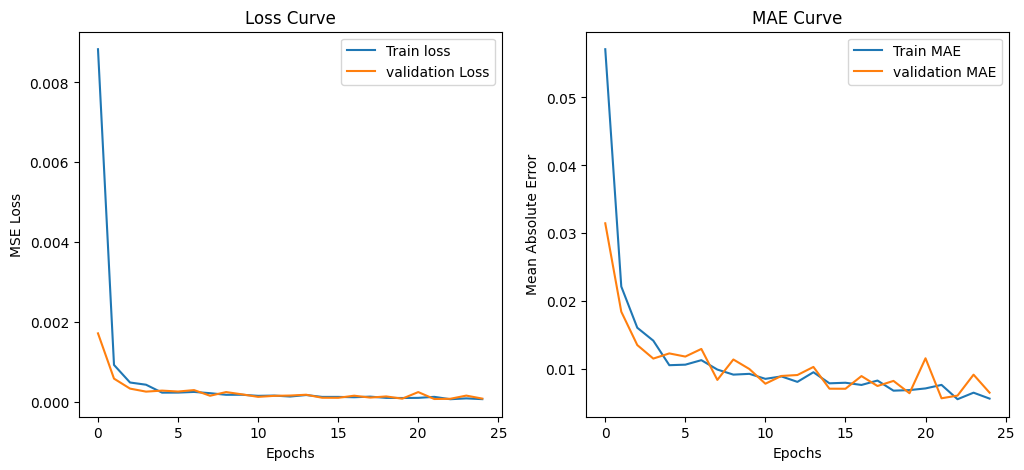

In [24]:
from types import LambdaType
plt.figure(figsize=(12,5))

#Loss Curve
plt.subplot(1,2,1)
plt.plot(history.history["loss"] ,label="Train loss")
plt.plot(history.history["val_loss"],label="validation Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()


#MAE Curve
plt.subplot(1,2,2)
plt.plot(history.history["mae"] ,label="Train MAE")
plt.plot(history.history["val_mae"],label="validation MAE")
plt.title("MAE Curve")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()

plt.show()

#Evaluate on Test set

In [25]:
print(f"Test Loss (MSE):{test_loss}")
print(f"Test MAE : {test_mae}")

Test Loss (MSE):8.114725642371923e-05
Test MAE : 0.006799028255045414


#Prediction and Visualization

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


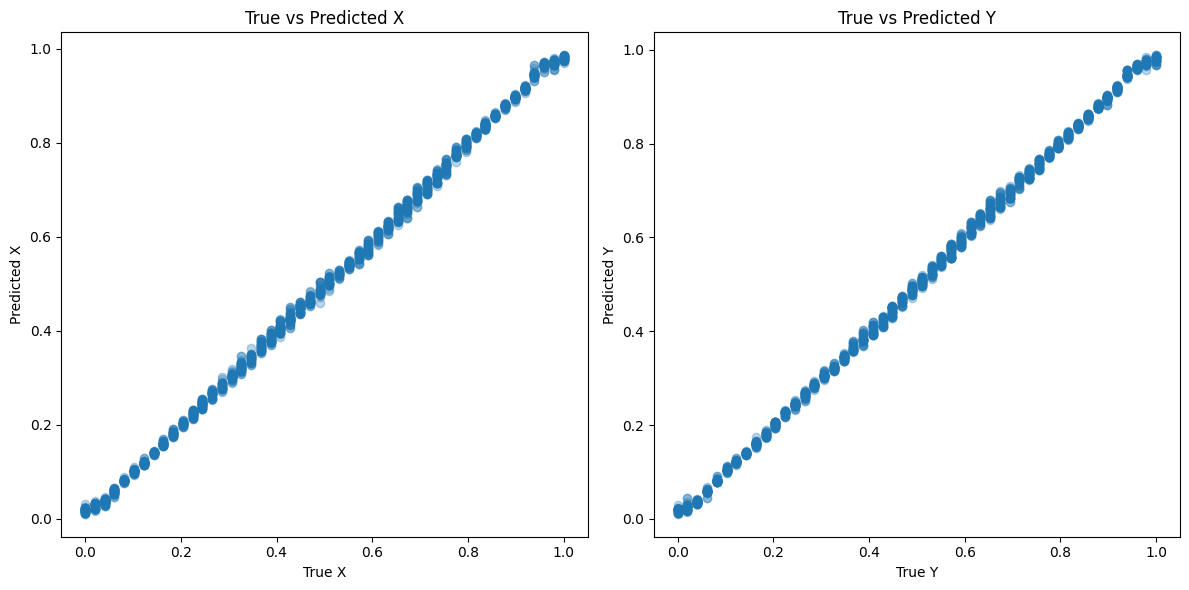

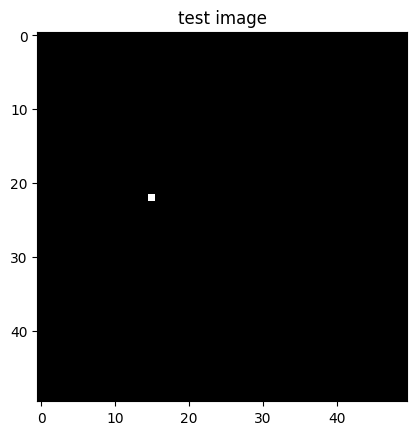

True Coordinates: [22. 15.]
Predicted Coordinates: [21.876461 14.869656]


In [26]:
predictions=model.predict(X_test)

#scatter plot:True vs Predicted coordinates
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(y_test[:,0],predictions[:,0],alpha=0.3)
plt.xlabel("True X")
plt.ylabel("Predicted X")
plt.title("True vs Predicted X")

plt.subplot(1,2,2)
plt.scatter(y_test[:,1],predictions[:,1],alpha=0.3)
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.title("True vs Predicted Y")

plt.tight_layout()
plt.show()

#visualize single test image with predicted coordinates
index=10
plt.imshow(X_test[index].squeeze(),cmap="gray")
plt.title("test image")
plt.show()

#scale back to original image coordinates
true_coords=y_test[index]*(image_size-1)
pred_coords=predictions[index]*(image_size-1)
print("True Coordinates:",true_coords)
print("Predicted Coordinates:",pred_coords)

#Rationale behind Dataset


The assignment requires predicting the (x, y) coordinates of a single white pixel in a 50×50 grayscale image, making it a regression problem with one clear feature per image.Images are 50×50 to balance computational efficiency and provide enough positional variability (2,500 possibilities).Each image contains one white pixel with intensity 255, ensuring a single signal for the model to learn.Pixel positions are randomized to cover all coordinates uniformly and prevent spatial bias.The dataset of 14,000 images is split into train/validation/test sets, with normalization applied to both images and labels for stable CNN training.